In [3]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec1 = np.array([1, 1, 1])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [4]:

import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:
# Step 1 - apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [6]:
covariance_matrix = np.cov([df.iloc[:, 0], df.iloc[:, 1], df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [9]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

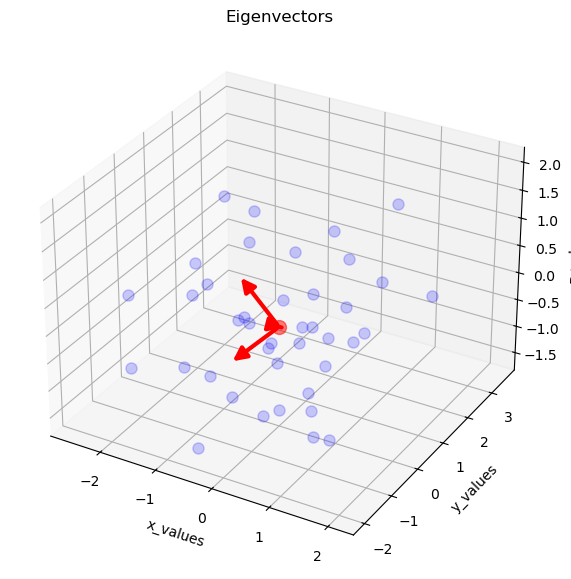

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), df['feature1'].mean() + v[0]],
                [df['feature2'].mean(), df['feature2'].mean() + v[1]],
                [df['feature3'].mean(), df['feature3'].mean() + v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [15]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [16]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [17]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

## Working with Digit Recognizer Dataset

link: https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [6]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


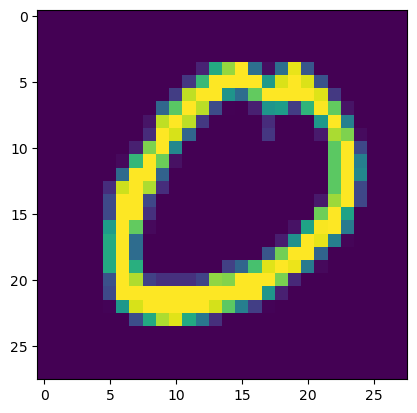

In [7]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[13051, 1:].values.reshape(28,28))

In [16]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [18]:
X_train.shape

(33600, 784)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

33.817245960235596


In [25]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.9648809523809524

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

X_train_trf.shape

(33600, 200)

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [31]:
start = time.time()
y_pred = knn.predict(X_test_trf)
print(time.time() - start)

2.246025323867798


In [32]:
accuracy_score(y_test, y_pred)

0.6440476190476191

In [36]:
for i in range(2, 752, 2):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test, y_pred))
    

0.32404761904761903
0.6548809523809523
0.8183333333333334
0.8640476190476191
0.7621428571428571
0.7238095238095238
0.6757142857142857
0.6860714285714286
0.6620238095238096
0.6554761904761904
0.6715476190476191
0.6691666666666667
0.6546428571428572
0.6498809523809523
0.6486904761904762
0.6510714285714285
0.6557142857142857
0.6539285714285714
0.6548809523809523
0.6558333333333334
0.6473809523809524
0.6498809523809523
0.6494047619047619
0.6486904761904762
0.6466666666666666
0.6479761904761905
0.6490476190476191
0.648452380952381
0.6451190476190476
0.6464285714285715
0.6533333333333333
0.6538095238095238
0.6517857142857143
0.651547619047619
0.6496428571428572
0.651547619047619
0.6498809523809523
0.6486904761904762
0.6453571428571429
0.6442857142857142
0.6477380952380952
0.6472619047619048
0.6495238095238095
0.6494047619047619
0.6475
0.6435714285714286
0.6442857142857142
0.645
0.6455952380952381
0.6421428571428571
0.6429761904761905
0.6422619047619048
0.6447619047619048
0.6444047619047619
0

KeyboardInterrupt: 

In [37]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [38]:
pca.explained_variance_.shape

(784,)

In [39]:
pca.components_.shape

(784, 784)

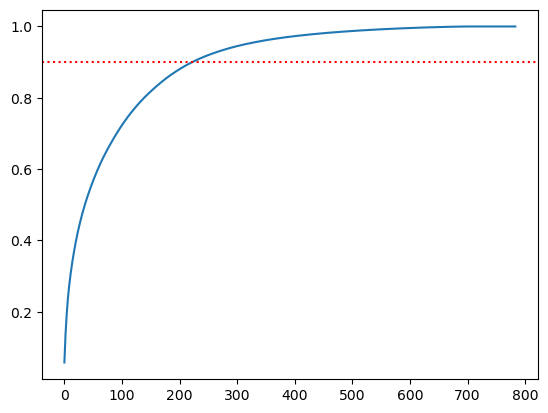

In [42]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9, color='red', linestyle='dotted')

Silhouette score: 0.5976764219547992


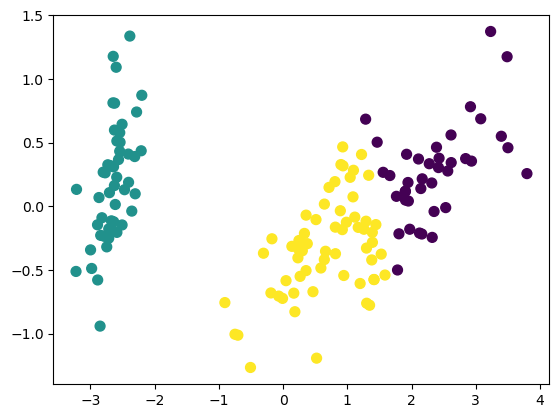

In [2]:
# practice
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print("Silhouette score:", score)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.show()